# 11-01 합성곱 신경망(Convolution Neural Network)

합성곱 신경망: 합성곱층(Convolution layer) + 풀링층(Pooling layer)

## 합성곱 신경망의 대두

 손글씨를 다층 퍼셉트론으로 분류한다고 하면, 이미지를 1차원 텐서인 벡터로 변환하고 다층 퍼셉트론의 입력층으로 사용해야 합니다. 두번째 손글씨를 다층 퍼셉트론으로 분류하기 위해서 벡터로 바꾸면 다음과 같습니다.  
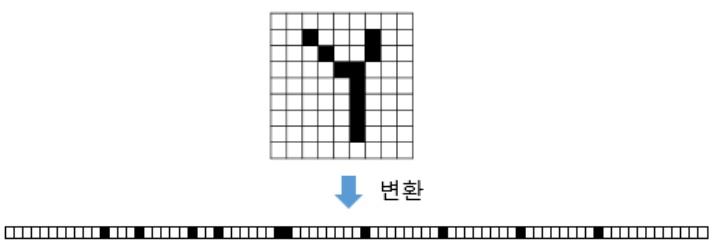  
1차원으로 변환된 결과는 사람이 보기에도 이게 원래 어떤 이미지였는지 알아보기가 어렵습니다. 이는 기계도 마찬가지 입니다. 위와 같이 결과는 변환 전에 가지고 있던 공간적인 구조(spatial structure) 정보가 유실된 상태입니다. 여기서 공간적인 구조 정보라는 것은 거리가 가까운 어떤 픽셀들끼리는 어떤 연관이 있고, 어떤 픽셀들끼리는 값이 비슷하거나 등을 포함하고 있습니다. 결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 합성곱 신경망을 사용합니다.

## 채널(Channel)

기계는 글자나 이미지보다 숫자. 다시 말해, 텐서를 더 잘 처리할 수 있습니다.  
이미지: 3차원 텐서 (높이, 너비, 채널)  
높이: 이미지의 세로 방향 픽셀 수  
너비: 이미지의 가로 방향 픽셀 수  
채널/깊이: 색 성분  

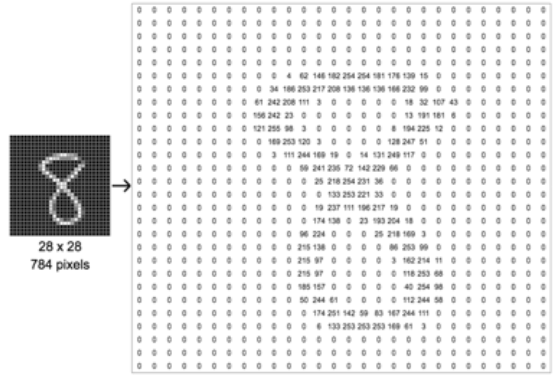  
(28 × 28 × 1)의 크기를 가지는 3차원 텐서

## 합성곱층의 합성곱 연산(Convolution operation)

합성곱 연산의 역할: 이미지의 특징을 추출  
합성곱 연산: 커널(kernel) 또는 필터(filter) 라는 nxm 크기의 행렬로 높이x너비 크기의 이미지를 이미지의 가장 왼쪽 위부터 가장 오른쪽 아래까지 순차적으로 겹치며 훑으면서 nxm 크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력(커널(kernel)은 일반적으로 3 × 3 또는 5 × 5를 사용)  
스트라이드(stride): 커널의 이동 범위(밑의 예제에서는 한 칸)  
특성 맵(feature map): 커널을 사용하여 합성곱 연산을 통해 나온 결과(입력보다 크기가 작은데 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 패딩(padding)을 사용)
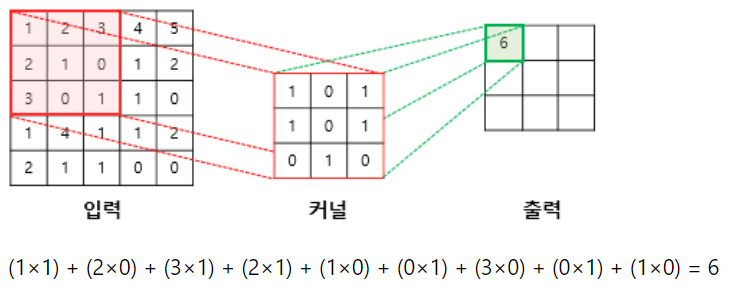  
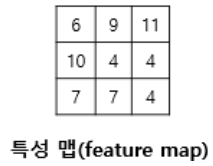

## 패딩(Padding)

패딩: 합성곱 연산을 하기 전에 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가(지정된 개수의 폭만큼 테두리를 추가)  
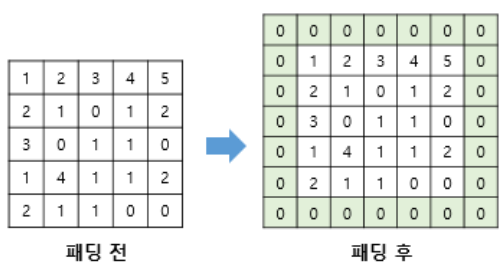  
5 × 5 이미지에 1폭짜리 제로 패딩을 사용

## 가중치와 편향

### 합성곱 신경망의 가중치

합성곱 신경망의 가중치: 커널 행렬의 원소들  
즉, 합성곱 신경망은 다층 퍼셉트론을 사용할 때보다 훨씬 적은 수의 가중치를 사용하며 공간적 구조 정보를 보존  
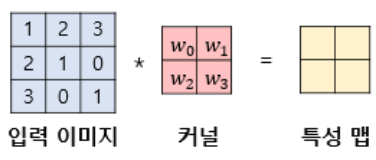  
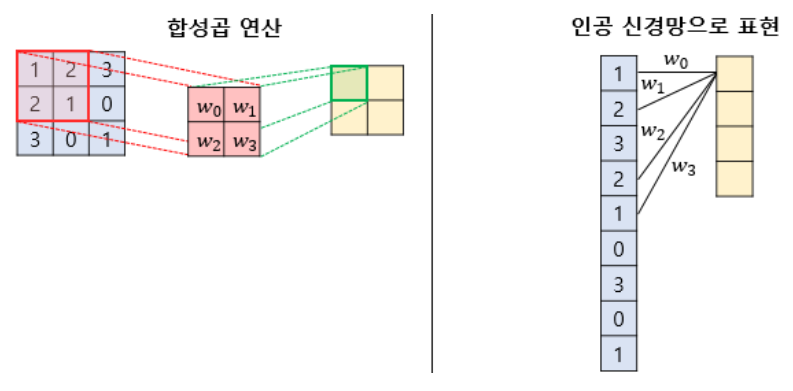  
인공 신경망의 형태로 표현한다면 다음과 같이 표현

다층 퍼셉트론의 은닉층에서는 가중치 연산 후에 비선형성을 추가하기 위해서 활성화 함수를 통과시켰습니다. 합성곱 신경망의 은닉층에서도 마찬가지입니다. 합성곱 연산을 통해 얻은 특성 맵은 다층 퍼셉트론때와 마찬가지로 비선형성 추가를 위해서 활성화 함수를 지나게 됩니다. 이때 렐루 함수나 렐루 함수의 변형들이 주로 사용됩니다. 이와 같이 합성곱 연산을 통해서 특성 맵을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 층을 합성곱 신경망에서는 합성곱 층(convolution layer)이라고 합니다.

### 합성곱 신경망의 편향

편향: 편향은 하나의 값만 존재하며, 커널이 적용된 결과의 모든 원소에 더함
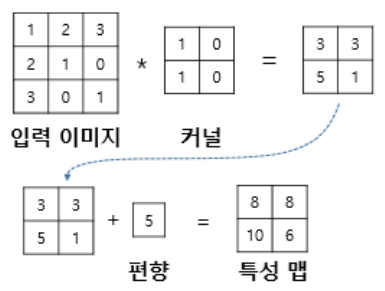

## 특성 맵의 크기 계산 방법

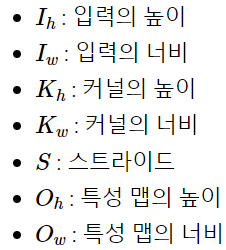  
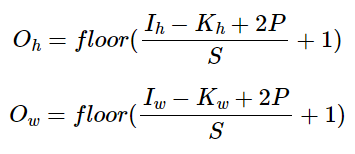

## 다수의 채널을 가질 경우의 합성곱 연산(3차원 텐서의 합성곱 연산)

다수의 채널을 가진 입력 데이터를 가지고 합성곱 연산: 커널의 채널 수도 입력의 채널 수만큼 존재하며(입력 데이터의 채널 수 == 커널의 채널 수) 합성곱 연산을 채널마다 수행하고 그 결과를 모두 더하여 최종 특성 맵 추출  
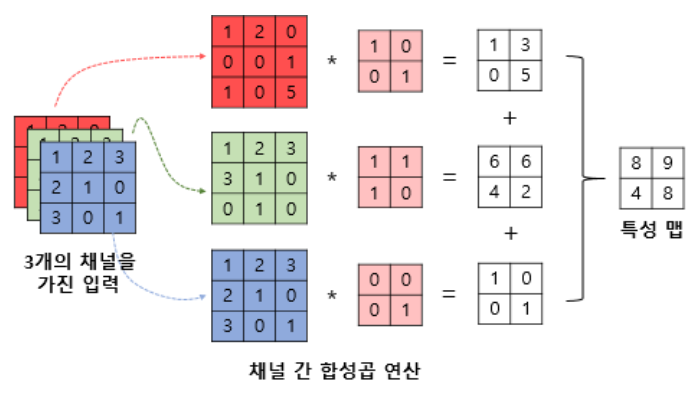  
(3,3,3) 입력, (2,2,3) 커널과 합성곱 연산 -> (2,2,1) 특성 맵  (합성곱 연산의 결과로 얻은 특성 맵의 채널 차원은 RGB 채널 등과 같은 컬러의 의미를 담고 있지는 않음)

## 3차원 텐서의 합성곱 연산

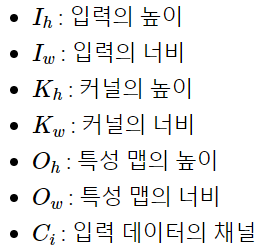  
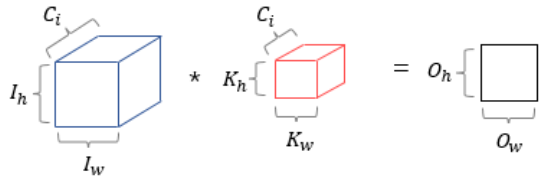  

합성곱 연산에서 다수의 커널을 사용할 경우, 사용한 커널 수는 합성곱 연산의 결과로 나오는 특성 맵의 채널 수가 됩니다. 
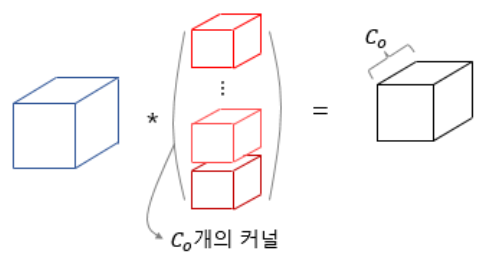  
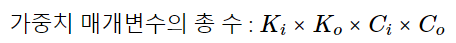   

## 풀링(Pooling)

합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적  
풀링(최대 풀링(max pooling)/평균 풀링(average pooling)): 커널과 스트라이드를 통해 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄임   
커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 합성곱 연산과의 차이점은 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않는다는 점 
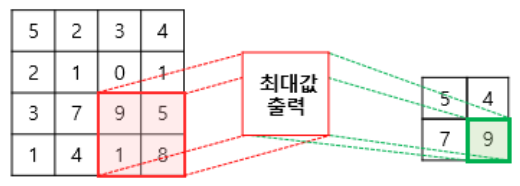